# Questão 7

In [36]:
import google.generativeai as genai
from google.colab import userdata
import os

gemini_api_key = userdata.get('gemini')

genai.configure(api_key=gemini_api_key)

model = genai.GenerativeModel(model_name="gemini-1.5-flash")

def create_resume_news_prompt(news: str):
    return f"""

    You are a journalist for a major news outlet. Resume a news article about the following events just like the example:

    * Allways be very very short
    * Always respond in the same language as the resume.

    <example>

        <event>

            A cat was rescued from a tree by a firefighter. The cat was stuck in the tree for 3 days and was finally rescued by the firefighter.
            The cat was taken to the vet and is now in good health. The firefighter was praised for his bravery and quick thinking.

        <event>

        <resume>
            A cat was rescued from a tree by a firefighter. The cat was stuck in the tree for 3 days and was finally rescued by the firefighter.
        <resume>

    <example>

    <event>
        {news}
    <event>


    """

news = """
O governo Lula (PT) vai reforçar a pressão junto a parlamentares pela PEC (Proposta de Emenda à Constituição) da Segurança Pública após a execução de um empresário no Aeroporto Internacional de São Paulo, em Guarulhos.
Clique aqui para seguir o canal do blog da Andréia Sadi no Whatsapp
O objetivo é, em encontros com deputados e senadores, ressaltar que a proposta torna compulsório o compartilhamento de informações entre as polícias, o que é considerado fundamental para combater o crime organizado.
O empresário morto em Guarulhos, Antônio Vinícius Lopes Gritzbach, era investigado por envolvimento com o Primeiro Comando da Capital (PCC) e havia fechado um acordo de delação para entregar informações sobre a organização e esquemas envolvendo policiais.
“Padronização de dados e metodologia uniforme é fundamental para combater o crime organizado que atua nacionalmente e até internacionalmente”, diz uma fonte do governo Lula. “[Atualmente] cada força se acha "dona" das informações e não as compartilha com as demais.”
A PEC da segurança pública foi apresentada no dia 31 de outubro numa reunião de Lula e outros integrantes do governo federal com governadores.
Na ocasião, alguns se mostraram reticentes – caso de Ronaldo Caiado (União), de Goiás, que disse a proposta era uma "invasão"
nas funções dos estados que Goiás não tinha problemas de segurança na mesma proporção que outros estados – Lula, em resposta, ironizou
 e disse que "Goiás é único estado que não tem problema de segurança" no Brasil.
Governador de São Paulo, Tarcísio de Freitas (Republicanos) argumentou que seria necessário ir além do que está previsto na PEC e propôs que os estados se reunissem
para apresentar propostas.
Segundo o blog apurou, o governo federal comemora o fato de Tarcísio não totalmente contrário à PEC, e sinalizou disposição para mudanças.
"""

response = model.generate_content(create_resume_news_prompt(news))


In [9]:
response.text

'<resume>\nApós a execução de um empresário no Aeroporto de Guarulhos, o governo Lula busca pressionar parlamentares pela aprovação da PEC da Segurança Pública, que visa o compartilhamento de informações entre as polícias para combater o crime organizado.\n</resume> \n'

# Questão 8

In [40]:
import google.generativeai as genai
from google.colab import userdata

# Retrieve the Gemini API key
gemini_api_key = userdata.get('gemini')
genai.configure(api_key=gemini_api_key)
model = genai.GenerativeModel(model_name="gemini-1.5-flash")

def create_prompt(text_input: str) -> str:
    prompt = f"""
    Você é um sistema de identificação de menções.

    * Always respond in valid JSON format
    * Always include public personalities, government departments, companies, and every entity mentioned in the text.

    <example>
    <event>
        A cat was rescued from a tree by a firefighter. The cat was stuck in the tree for 3 days and was finally rescued by the firefighter.
        The cat was taken to the vet and is now in good health. The firefighter was praised for his bravery and quick thinking.
    <event>

    <mention json>
        {{
            "entities": ["Cat", "Firefighter"]
        }}
    <mention json>
    <example>

    <event>
        {text_input}
    <event>
    """

    return prompt

news = """
O governo Lula (PT) vai reforçar a pressão junto a parlamentares pela PEC (Proposta de Emenda à Constituição) da Segurança Pública após a execução de um empresário no Aeroporto Internacional de São Paulo, em Guarulhos.
Clique aqui para seguir o canal do blog da Andréia Sadi no Whatsapp
O objetivo é, em encontros com deputados e senadores, ressaltar que a proposta torna compulsório o compartilhamento de informações entre as polícias, o que é considerado fundamental para combater o crime organizado.
O empresário morto em Guarulhos, Antônio Vinícius Lopes Gritzbach, era investigado por envolvimento com o Primeiro Comando da Capital (PCC) e havia fechado um acordo de delação para entregar informações sobre a organização e esquemas envolvendo policiais.
“Padronização de dados e metodologia uniforme é fundamental para combater o crime organizado que atua nacionalmente e até internacionalmente”, diz uma fonte do governo Lula. “[Atualmente] cada força se acha "dona" das informações e não as compartilha com as demais.”
A PEC da segurança pública foi apresentada no dia 31 de outubro numa reunião de Lula e outros integrantes do governo federal com governadores.
Na ocasião, alguns se mostraram reticentes – caso de Ronaldo Caiado (União), de Goiás, que disse a proposta era uma "invasão"
nas funções dos estados que Goiás não tinha problemas de segurança na mesma proporção que outros estados – Lula, em resposta, ironizou
 e disse que "Goiás é único estado que não tem problema de segurança" no Brasil.
Governador de São Paulo, Tarcísio de Freitas (Republicanos) argumentou que seria necessário ir além do que está previsto na PEC e propôs que os estados se reunissem
para apresentar propostas.
Segundo o blog apurou, o governo federal comemora o fato de Tarcísio não totalmente contrário à PEC, e sinalizou disposição para mudanças.
"""

response = model.generate_content(create_prompt(news))


In [41]:
print(response.text)

```json
{
  "entities": [
    "Lula",
    "PT",
    "PEC",
    "Proposta de Emenda à Constituição",
    "Segurança Pública",
    "Aeroporto Internacional de São Paulo",
    "Guarulhos",
    "Andréia Sadi",
    "Whatsapp",
    "Primeiro Comando da Capital",
    "PCC",
    "Antônio Vinícius Lopes Gritzbach",
    "Governo Lula",
    "Ronaldo Caiado",
    "União",
    "Goiás",
    "Tarcísio de Freitas",
    "Republicanos",
    "Governador de São Paulo",
    "Governo Federal"
  ]
}
```


# Questão 9

In [33]:
from vertexai.preview import tokenization

big_text = " ".join(["words"] * 5000)

def get_tokens(text: str) -> int:
    model_name = "gemini-1.5-flash-001"
    tokenizer = tokenization.get_tokenizer_for_model(model_name)

    contents = text
    result = tokenizer.count_tokens(contents)

    return result.total_tokens

print(get_tokens("ola, meu nome"))

4


**Conclusão:** Os transformers são estruturas de processamento horizontal, onde cada transformer processa um token, e os resultado dos tokens a esquerda, fazendo com que, quanto mais tokens, mais variáveis entrem nos cálculos, e mais processamento seja exigido pela LLM

# Questão 11

In [50]:
import google.generativeai as genai
import yaml

with open('roteiro.yaml', 'r') as file:
    config = yaml.safe_load(file)

gemini_api_key = userdata.get('gemini')
genai.configure(api_key=gemini_api_key)
model = genai.GenerativeModel(model_name="gemini-1.5-flash")

def run_prompt(city):
    base_prompt =  f"""
      Você é um guia turistico experiênte: Liste 3 pontos turísticos de {city}.

      Liste:
      - o número anual de visitantes de cada um
      - uma breve descrição de cada um

    """

    response = model.generate_content(base_prompt)
    print(f"\nResultados para {city}:\n")
    print(response.text)

for city in config['roteiro']:
    run_prompt(city)



Resultados para atenas:

## 3 Pontos Turísticos Imperdíveis em Atenas:

**1. Acrópole de Atenas:**

* **Visitantes Anuais:** Mais de 3 milhões
* **Descrição:** Um dos monumentos mais icônicos da Grécia Antiga, a Acrópole é um complexo de templos e construções antigas no topo de uma colina rochosa, com vistas panorâmicas da cidade. O destaque é o Partenon, dedicado à deusa Atena, que representa o auge da arquitetura dórica. Outros pontos importantes são o Erechtheion, com suas famosas Cariátides, e o Templo de Atena Nike.

**2. Ágora Antiga:**

* **Visitantes Anuais:** Mais de 1 milhão
* **Descrição:** A Ágora era o centro político, comercial e social da Atenas Antiga. As ruínas de templos, edifícios públicos e mercados ainda hoje oferecem uma visão fascinante da vida na cidade há séculos. Destaque para o Templo de Hefesto, um dos edifícios gregos mais bem preservados, e o Stoa de Attalos, uma galeria com lojas e oficinas que foi reconstruída e hoje abriga um museu.

**3. Museu da Acró

# Questão 12

In [83]:
import typing_extensions as typing
import google.generativeai as genai
import yaml
import json

with open('roteiro.yaml', 'r') as file:
    config = yaml.safe_load(file)

gemini_api_key = userdata.get('gemini')
genai.configure(api_key=gemini_api_key)
model = genai.GenerativeModel(model_name="gemini-1.5-flash")


class PlaceDTO(typing.TypedDict):
  city_name: str
  name: str
  description: str
  anual_visitors: int

class PlaceDTO(typing.TypedDict):
  name: str
  description: str
  anual_visitors: int

def run_prompt(city: str) -> str:
    base_prompt =  f"""
      Você é um guia turistico experiênte: Liste 3 pontos turísticos de {city}.

      Liste:
      - o número anual de visitantes de cada um
      - uma breve descrição de cada um

      Responda em português, utilizando o formato JSON.

    """

    response = model.generate_content(base_prompt,
                                      generation_config=genai.GenerationConfig(response_mime_type="application/json",
                                           response_schema = list[PlaceDTO]))
    return response.text

data = []

for city in config['roteiro']:
    dtos = json.loads(run_prompt(city))
    placesDTO = [PlaceDTO(**dto) for dto in dtos]
    places = [{'city_name': city, **place} for place in placesDTO]
    data.extend(places)



0    blue
1    blue
2    blue
3     red
4     red
5     red
Name: colors, dtype: object


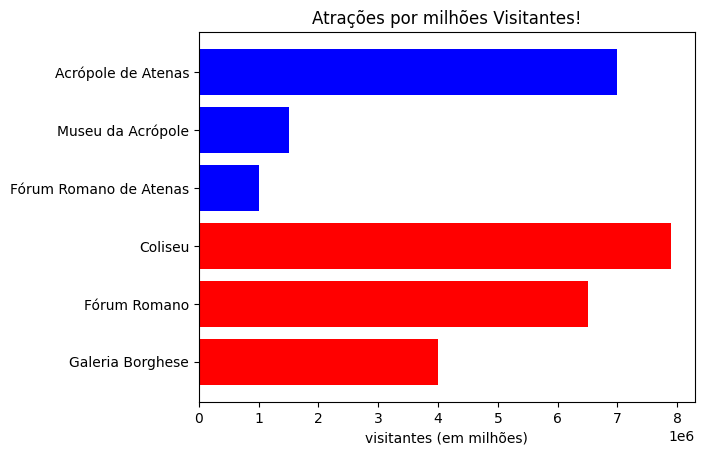

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(data)

df['colors'] = df['city_name'].apply(lambda x: 'blue' if x == 'atenas' else 'red')

fig, ax = plt.subplots()

print(df['colors'])

ax.barh(df['name'], df['anual_visitors'], align='center', color=df['colors'])
ax.invert_yaxis()
ax.set_xlabel('visitantes (em milhões)')
ax.set_title('Atrações por milhões Visitantes!')

plt.show()


In [89]:
df

,city_name,anual_visitors,description,name
0,atenas,7000000,A Acrópole de Atenas é um dos monumentos mais ...,Acrópole de Atenas
1,atenas,1500000,O Museu da Acrópole abriga uma coleção impress...,Museu da Acrópole
2,atenas,1000000,O Fórum Romano de Atenas é um sítio arqueológi...,Fórum Romano de Atenas
3,roma,7900000,"O Coliseu é um anfiteatro oval, construído em ...",Coliseu
4,roma,6500000,"O Fórum Romano é um vasto complexo de ruínas, ...",Fórum Romano
5,roma,4000000,A Galeria Borghese é um museu e uma galeria de...,Galeria Borghese
